In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import make_classification

In [5]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples = 2000, n_classes = 2, weights = [1, 1], random_state = 1)

In [6]:
X.shape

(2000, 20)

In [7]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9833722222222222


In [12]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.04, 0.96],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.25, 0.75]])

In [13]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print("Logistic train roc-auc: {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
ytest_pred = rf_model.predict_proba(X_test)
print("RF test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:, 1])))

Logistic train roc-auc: 0.9863568922694498
RF test roc-auc: 0.9833722222222222


In [16]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print("Adaboost train roc-auc: {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print("Adaboost test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:, 1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytain_pred = knn_classifier.predict_proba(X_train)
print("Adaboost train roc-auc: {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print("Adaboost test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:, 1])))

Adaboost train roc-auc: 0.9863568922694498
Adaboost test roc-auc: 0.9426111111111111


In [18]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
  pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
final_prediction = pd.concat(pred, axis = 1).mean(axis = 1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, ytest_pred[:, 1])))

Ensemble test roc-auc: 0.9826111111111111


In [19]:
pd.concat(pred, axis = 1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.60,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [20]:
final_prediction

0      0.885262
1      0.118323
2      0.821283
3      0.755353
4      0.567447
         ...   
595    0.123840
596    0.117845
597    0.876697
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91172166, 0.91172166, 0.90873256, 0.90827475, 0.8044465 ,
       0.8030558 , 0.79949934, 0.79662833, 0.77909273, 0.77821156,
       0.76374415, 0.76287124, 0.71847083, 0.71637362, 0.70544088,
       0.69893711, 0.6592442 , 0.65493537, 0.61744697, 0.61175354,
       0.60779968, 0.60614346, 0.58399047, 0.58236186, 0.56744674,
       0.56550386, 0.56406376, 0.56139283, 0.55088469, 0.54969563,
       0.54792732, 0.54127948, 0.52865858, 0.47366892, 0.45490225,
       0.44222765, 0.4396034 , 0.39318654, 0.39129719, 0.36090767,
       0.35086612, 0.23967239, 0.23890421, 0.22198424, 0.22146893,
       0.19852808, 0.19848417, 0.12288782, 0.1228351 , 0.10748954])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(final_prediction> thres, 1, 0)
  accuracy_ls.append(accuracy_score(y_test, y_pred, normalize = True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis = 1)
accuracy_ls.columns = ["thresholds", "accuracy"]

In [23]:
accuracy_ls

,thresholds,accuracy
0,1.911722,0.500000
1,0.911722,0.500000
2,0.908733,0.506667
3,0.908275,0.508333
4,0.804447,0.806667
5,0.803056,0.808333
6,0.799499,0.811667
7,0.796628,0.813333
8,0.779093,0.843333
9,0.778212,0.845000


In [24]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = "orange", label = "ROC")
  plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()

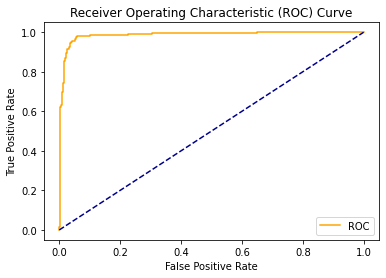

In [25]:
plot_roc_curve(fpr, tpr)